In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import Sequential, models, layers
from keras.layers import Dropout, BatchNormalization, Dense
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [44]:
index_names = ["Engine", "Cycle"]
setting_names = ["Setting 1", "Setting 2", "Setting 3"]
sensor_names = [
    "(Fan Inlet Temperature) (◦R)",
    "(LPC Outlet Temperature) (◦R)",
    "(HPC Outlet Temperature) (◦R)",
    "(LPT Outlet Temperature) (◦R)",
    "(Fan Inlet Pressure) (psia)",
    "(Bypass-Duct Pressure) (psia)",
    "(HPC Outlet Pressure) (psia)",
    "(Physical Fan Speed) (rpm)",
    "(Physical Core Speed) (rpm)",
    "(Engine Pressure Ratio(P50/P2)",
    "(HPC Outlet Static Pressure) (psia)",
    "(Ratio of Fuel Flow to Ps30) (pps/psia)",
    "(Corrected Fan Speed) (rpm)",
    "(Corrected Core Speed) (rpm)",
    "(Bypass Ratio) ",
    "(Burner Fuel-Air Ratio)",
    "(Bleed Enthalpy)",
    "(Required Fan Speed)",
    "(Required Fan Conversion Speed)",
    "(High-Pressure Turbines Cool Air Flow)",
    "(Low-Pressure Turbines Cool Air Flow)",
]

col_names = index_names + setting_names + sensor_names
rul_col = ["RUL"]

In [45]:
DATA_DIR = "..\data\HybridLearningDataset\CMAPSSData"
TRAIN_FD001 = "train_FD001.txt"
TEST_FD001 = "test_FD001.txt"
RUL_FD001 = "RUL_FD001.txt"

TRAIN_DIR = os.path.join(DATA_DIR, TRAIN_FD001)
TEST_DIR = os.path.join(DATA_DIR, TEST_FD001)
RUL_DIR = os.path.join(DATA_DIR, RUL_FD001)

In [46]:
def load_data(file_path, col_names=None):
    data = pd.read_csv(file_path, sep="\s+", header=None, names=col_names)
    print(f"Data loaded successfully from {file_path}")
    return data

In [47]:
df_train = load_data(TRAIN_DIR, col_names)
df_test = load_data(TEST_DIR, col_names)
df_rul = load_data(RUL_DIR, rul_col)

Data loaded successfully from ..\data\HybridLearningDataset\CMAPSSData\train_FD001.txt
Data loaded successfully from ..\data\HybridLearningDataset\CMAPSSData\test_FD001.txt
Data loaded successfully from ..\data\HybridLearningDataset\CMAPSSData\RUL_FD001.txt


In [48]:
display(df_train.head())
display(df_test.head())
display(df_rul.head())

,Engine,Cycle,Setting 1,Setting 2,Setting 3,(Fan Inlet Temperature) (◦R),(LPC Outlet Temperature) (◦R),(HPC Outlet Temperature) (◦R),(LPT Outlet Temperature) (◦R),(Fan Inlet Pressure) (psia),(Bypass-Duct Pressure) (psia),(HPC Outlet Pressure) (psia),(Physical Fan Speed) (rpm),(Physical Core Speed) (rpm),(Engine Pressure Ratio(P50/P2),(HPC Outlet Static Pressure) (psia),(Ratio of Fuel Flow to Ps30) (pps/psia),(Corrected Fan Speed) (rpm),(Corrected Core Speed) (rpm),(Bypass Ratio),(Burner Fuel-Air Ratio),(Bleed Enthalpy),(Required Fan Speed),(Required Fan Conversion Speed),(High-Pressure Turbines Cool Air Flow),(Low-Pressure Turbines Cool Air Flow)
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


,Engine,Cycle,Setting 1,Setting 2,Setting 3,(Fan Inlet Temperature) (◦R),(LPC Outlet Temperature) (◦R),(HPC Outlet Temperature) (◦R),(LPT Outlet Temperature) (◦R),(Fan Inlet Pressure) (psia),(Bypass-Duct Pressure) (psia),(HPC Outlet Pressure) (psia),(Physical Fan Speed) (rpm),(Physical Core Speed) (rpm),(Engine Pressure Ratio(P50/P2),(HPC Outlet Static Pressure) (psia),(Ratio of Fuel Flow to Ps30) (pps/psia),(Corrected Fan Speed) (rpm),(Corrected Core Speed) (rpm),(Bypass Ratio),(Burner Fuel-Air Ratio),(Bleed Enthalpy),(Required Fan Speed),(Required Fan Conversion Speed),(High-Pressure Turbines Cool Air Flow),(Low-Pressure Turbines Cool Air Flow)
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


,RUL
0,112
1,98
2,69
3,82
4,91


In [49]:
df_train.shape, df_test.shape, df_rul.shape

((20631, 26), (13096, 26), (100, 1))

In [50]:
df_train.loc[:, ["Engine", "Cycle"]].describe()

,Engine,Cycle
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [58]:
num_of_cycles_for_engines = df_train.groupby("Engine")["Cycle"].max()
pd.DataFrame(num_of_cycles_for_engines)

,Cycle
Engine,
1,192
2,287
3,179
4,189
5,269
...,...
96,336
97,202
98,156


Text(0, 0.5, 'max_cycle')

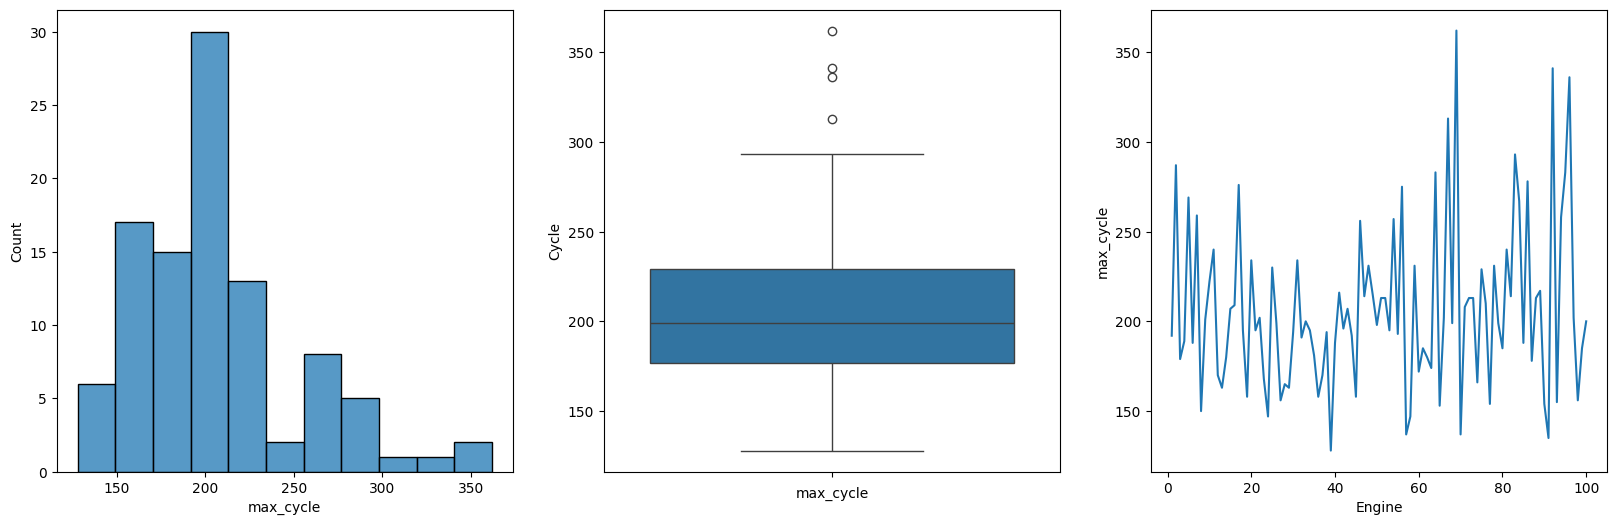

In [64]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(num_of_cycles_for_engines, kde=False, bins="fd", ax=ax[0])
ax[0].set_xlabel("max_cycle")

sns.boxplot(num_of_cycles_for_engines, ax=ax[1])
ax[1].set_xlabel("max_cycle")

num_of_cycles_for_engines.plot(ax=ax[2])
ax[2].set_xlabel("Engine")
ax[2].set_ylabel("max_cycle")